# Predicting Chocolate Ratings

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

Link to Data
- From Kaggle

    https://www.kaggle.com/rtatman/chocolate-bar-ratings

## 3) Import your data
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv

In [2]:
Chocolate_df= pd.read_csv('flavors_of_cacao.csv', header=0)

## 4) Show me the head of your data.

In [3]:
#First ten rows of the dataset
Chocolate_df.head(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


## 6) Show me the proportion of missing observations for each column of your data

In [4]:
Chocolate_df.isna().head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [5]:
#total NA values in each column
Chocolate_df.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [6]:
#Where are the NA values
np.where(pd.isnull(Chocolate_df))

(array([1072, 1544]), array([8, 7]))

In [7]:
#Looking at missing values
Chocolate_df.loc[1072,:]

Company \n(Maker-if known)           Mast Brothers
Specific Bean Origin\nor Bar Name       Madagascar
REF                                            999
Review\nDate                                  2012
Cocoa\nPercent                                 72%
Company\nLocation                           U.S.A.
Rating                                         2.5
Bean\nType                              Trinitario
Broad Bean\nOrigin                             NaN
Name: 1072, dtype: object

In [8]:
# But if we look at the data
Chocolate_df.head(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [9]:
# There are values that are blank which are not counted as NA
#Replace blank cells with NA
ChocolateNa_df = Chocolate_df.replace(r'^\s+$', np.nan, regex=True)

In [10]:
#New total NA values in each column
ChocolateNa_df.isna().sum()

Company \n(Maker-if known)             0
Specific Bean Origin\nor Bar Name      0
REF                                    0
Review\nDate                           0
Cocoa\nPercent                         0
Company\nLocation                      0
Rating                                 0
Bean\nType                           888
Broad Bean\nOrigin                    74
dtype: int64

In [11]:
#Shape showing total number of rows
ChocolateNa_df.shape

(1795, 9)

In [12]:
#Total number of values in each column that are not NA
ChocolateNa_df.count()

Company \n(Maker-if known)           1795
Specific Bean Origin\nor Bar Name    1795
REF                                  1795
Review\nDate                         1795
Cocoa\nPercent                       1795
Company\nLocation                    1795
Rating                               1795
Bean\nType                            907
Broad Bean\nOrigin                   1721
dtype: int64

In [13]:
#Proportion of missing values in each column 
Proportion = (ChocolateNa_df.isna().sum())/(ChocolateNa_df.count()+ChocolateNa_df.isna().sum())
Proportion

Company \n(Maker-if known)           0.000000
Specific Bean Origin\nor Bar Name    0.000000
REF                                  0.000000
Review\nDate                         0.000000
Cocoa\nPercent                       0.000000
Company\nLocation                    0.000000
Rating                               0.000000
Bean\nType                           0.494708
Broad Bean\nOrigin                   0.041226
dtype: float64

# Exploring data and cleaning

In [14]:
#Renaming columns so that there are no more spaces or backslashes
Chocolate= ChocolateNa_df.rename({"Company\xa0\n(Maker-if known)":"Company",
                               'Specific Bean Origin\nor Bar Name': "BeanOrigin",
                              "Review\nDate": "Date",
                              "Cocoa\nPercent": "CocoaPercent",
                                         "Company\nLocation":"Location",
                                         "Bean\nType":"BeanType",
                                         "Broad Bean\nOrigin":"BroadOrigin"}, axis='columns')

In [15]:
Chocolate.head()

,Company,BeanOrigin,REF,Date,CocoaPercent,Location,Rating,BeanType,BroadOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru


In [16]:
#value types
Chocolate.dtypes

Company          object
BeanOrigin       object
REF               int64
Date              int64
CocoaPercent     object
Location         object
Rating          float64
BeanType         object
BroadOrigin      object
dtype: object

In [17]:
# Drop BeanType column because it contains ~ 50% missing values
ChocolateClean=Chocolate.drop(columns=['BeanType'])

In [18]:
ChocolateClean.head()

,Company,BeanOrigin,REF,Date,CocoaPercent,Location,Rating,BroadOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [19]:
ChocolateClean.isna().sum()

Company          0
BeanOrigin       0
REF              0
Date             0
CocoaPercent     0
Location         0
Rating           0
BroadOrigin     74
dtype: int64

In [20]:
#There are still NA values in the BroadOrigin column
ChocolateClean.loc[Chocolate.BroadOrigin.isna()].head()

,Company,BeanOrigin,REF,Date,CocoaPercent,Location,Rating,BroadOrigin
77,Amedei,Nine,111,2007,75%,Italy,4.00,NaN
85,Amedei,Toscano Black,170,2007,63%,Italy,3.50,NaN
86,Amedei,Toscano Black,40,2006,70%,Italy,5.00,NaN
87,Amedei,Toscano Black,75,2006,66%,Italy,4.00,NaN
144,Bahen & Co.,Houseblend,1474,2015,80%,Australia,3.25,NaN


In [21]:
#Where are there NA spots
np.where(pd.isnull(ChocolateClean))

(array([  77,   85,   86,   87,  144,  148,  182,  214,  245,  277,  329,
         381,  393,  416,  417,  421,  465,  482,  554,  564,  565,  634,
         644,  739,  749,  754,  755,  756,  759,  760,  762,  764,  769,
         770,  772,  774,  775,  776,  777,  779,  897,  937,  938,  975,
        1048, 1072, 1074, 1114, 1115, 1120, 1129, 1175, 1231, 1272, 1366,
        1374, 1411, 1414, 1436, 1439, 1440, 1443, 1506, 1526, 1624, 1625,
        1683, 1686, 1694, 1766, 1774, 1778, 1780, 1789]),
 array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7]))

In [22]:
#Drop rows with NA values
ChocolateClean2=ChocolateClean.drop([  77,   85,   86,   87,  144,  148,  182,  214,  245,  277,  329,
         381,  393,  416,  417,  421,  465,  482,  554,  564,  565,  634,
         644,  739,  749,  754,  755,  756,  759,  760,  762,  764,  769,
         770,  772,  774,  775,  776,  777,  779,  897,  937,  938,  975,
        1048, 1072, 1074, 1114, 1115, 1120, 1129, 1175, 1231, 1272, 1366,
        1374, 1411, 1414, 1436, 1439, 1440, 1443, 1506, 1526, 1624, 1625,
        1683, 1686, 1694, 1766, 1774, 1778, 1780, 1789])

In [23]:
ChocolateClean2.head()

,Company,BeanOrigin,REF,Date,CocoaPercent,Location,Rating,BroadOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [24]:
#Check for NA values
ChocolateClean2.isna().sum()

Company         0
BeanOrigin      0
REF             0
Date            0
CocoaPercent    0
Location        0
Rating          0
BroadOrigin     0
dtype: int64

In [25]:
#Dimensions of cleaned Data
ChocolateClean2.shape

(1721, 8)

In [26]:
#Dimensions of original data
Chocolate_df.shape

(1795, 9)

In [27]:
#Unique ratings
ChocolateClean2.Rating.unique()

array([3.75, 2.75, 3.  , 3.5 , 4.  , 3.25, 2.5 , 5.  , 1.75, 1.5 , 2.25,
       2.  , 1.  ])

In [28]:
#Looking at unique Location
ChocolateClean2.Location.unique()

array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil',
       'U.K.', 'Australia', 'Wales', 'Belgium', 'Germany', 'Russia',
       'Puerto Rico', 'Venezuela', 'Colombia', 'Japan', 'New Zealand',
       'Costa Rica', 'South Korea', 'Amsterdam', 'Scotland', 'Martinique',
       'Sao Tome', 'Argentina', 'Guatemala', 'South Africa', 'Bolivia',
       'St. Lucia', 'Portugal', 'Singapore', 'Denmark', 'Vietnam',
       'Grenada', 'Israel', 'India', 'Czech Republic',
       'Domincan Republic', 'Finland', 'Madagascar', 'Philippines',
       'Sweden', 'Poland', 'Austria', 'Honduras', 'Nicaragua',
       'Lithuania', 'Niacragua', 'Chile', 'Ghana', 'Iceland', 'Eucador',
       'Hungary', 'Suriname', 'Ireland'], dtype=object)

In [29]:
#Looking at unique Bean Origins
ChocolateClean2.BeanOrigin.unique()


array(['Agua Grande', 'Kpime', 'Atsane', 'Akata', 'Quilla', 'Carenero',
       'Cuba', 'Sur del Lago', 'Puerto Cabello', 'Pablino', 'Panama',
       'Madagascar', 'Brazil', 'Equateur', 'Colombie', 'Birmanie',
       'Papua New Guinea', 'Chuao', 'Piura', 'Chanchamayo Province',
       'Bolivia', 'Peru', 'Chulucanas, El Platanal', 'Tumbes, Norandino',
       'Vanua Levu', 'Vanua Levu, Toto-A', 'Vanua Levu, Ami-Ami-CA',
       'Los Rios, Quevedo, Arriba', 'Tabasco',
       'Bali (west), Sukrama Family, Melaya area',
       'Madagascar, Ambolikapiky P.', 'Monte Alegre, D. Badero',
       'Trinite', 'Vietnam', 'Piura, Perou', 'Winak Coop, Napo',
       'La Dalia, Matagalpa', 'Tien Giang', 'Makwale Village, Kyela',
       'Momotombo', 'Acopagro', 'CIAAB Coop', 'Villa Andina',
       'Gruppo Salinas', 'Conacado', 'Morobe', 'Dos Rios', 'Guayas',
       'Montanya', 'Bali, Jembrana', 'Cuyagua', 'Ocumare', 'Ghana',
       'Ecuador', 'LamasdelChanka, San Martin, Oro Verde coop',
       'Bellavista

In [30]:
#Looking at number of unique Bean Origins
ChocolateClean2.BeanOrigin.unique().shape

(981,)

In [31]:
ChocolateClean2.CocoaPercent.unique()

array(['63%', '70%', '60%', '80%', '88%', '72%', '55%', '75%', '65%',
       '85%', '73%', '64%', '66%', '68%', '50%', '100%', '77%', '90%',
       '71%', '83%', '78%', '74%', '76%', '86%', '82%', '69%', '91%',
       '42%', '61%', '73.5%', '62%', '67%', '58%', '60.5%', '79%', '81%',
       '57%', '72.5%', '56%', '46%', '89%', '84%', '53%', '87%', '99%'],
      dtype=object)

In [32]:
#Unique values in each column
ChocolateClean2.nunique()

Company         409
BeanOrigin      981
REF             440
Date             12
CocoaPercent     45
Location         60
Rating           13
BroadOrigin      99
dtype: int64

In [33]:
#drop BeanOrigin bc there are so many unique values
ChocolateClean3= ChocolateClean2.drop(columns=['BeanOrigin'])

In [34]:
ChocolateClean3.head()

,Company,REF,Date,CocoaPercent,Location,Rating,BroadOrigin
0,A. Morin,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,1676,2015,70%,France,2.75,Togo
2,A. Morin,1676,2015,70%,France,3.00,Togo
3,A. Morin,1680,2015,70%,France,3.50,Togo
4,A. Morin,1704,2015,70%,France,3.50,Peru


In [35]:
ChocolateClean3.shape

(1721, 7)

In [36]:
#Looking at cocoa percent
ChocolateClean3.CocoaPercent.unique()

array(['63%', '70%', '60%', '80%', '88%', '72%', '55%', '75%', '65%',
       '85%', '73%', '64%', '66%', '68%', '50%', '100%', '77%', '90%',
       '71%', '83%', '78%', '74%', '76%', '86%', '82%', '69%', '91%',
       '42%', '61%', '73.5%', '62%', '67%', '58%', '60.5%', '79%', '81%',
       '57%', '72.5%', '56%', '46%', '89%', '84%', '53%', '87%', '99%'],
      dtype=object)

In [37]:
# Cocoa percent is an object. Remove % sign
ChocolateClean4= ChocolateClean3.replace(r'%', ' ', regex=True)

In [38]:
#CocoaPercent is still an object
ChocolateClean4.dtypes

Company          object
REF               int64
Date              int64
CocoaPercent     object
Location         object
Rating          float64
BroadOrigin      object
dtype: object

In [39]:
#Change to float
Chocolate_cleaned= ChocolateClean4.astype({'CocoaPercent': 'float'})

In [40]:
Chocolate_cleaned.CocoaPercent.unique()

array([ 63. ,  70. ,  60. ,  80. ,  88. ,  72. ,  55. ,  75. ,  65. ,
        85. ,  73. ,  64. ,  66. ,  68. ,  50. , 100. ,  77. ,  90. ,
        71. ,  83. ,  78. ,  74. ,  76. ,  86. ,  82. ,  69. ,  91. ,
        42. ,  61. ,  73.5,  62. ,  67. ,  58. ,  60.5,  79. ,  81. ,
        57. ,  72.5,  56. ,  46. ,  89. ,  84. ,  53. ,  87. ,  99. ])

In [41]:
Chocolate_cleaned.dtypes

Company          object
REF               int64
Date              int64
CocoaPercent    float64
Location         object
Rating          float64
BroadOrigin      object
dtype: object

## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

* Can the data regarding cocoa percent, maker, location, date, and broad bean origin be useful in predicting the chocolate tast rating?
* GOAL: Predict chocolate taste rating given the information about cocoa content percent, maker, location, and broad bean origin. 

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

My y variable is 'Rating'.

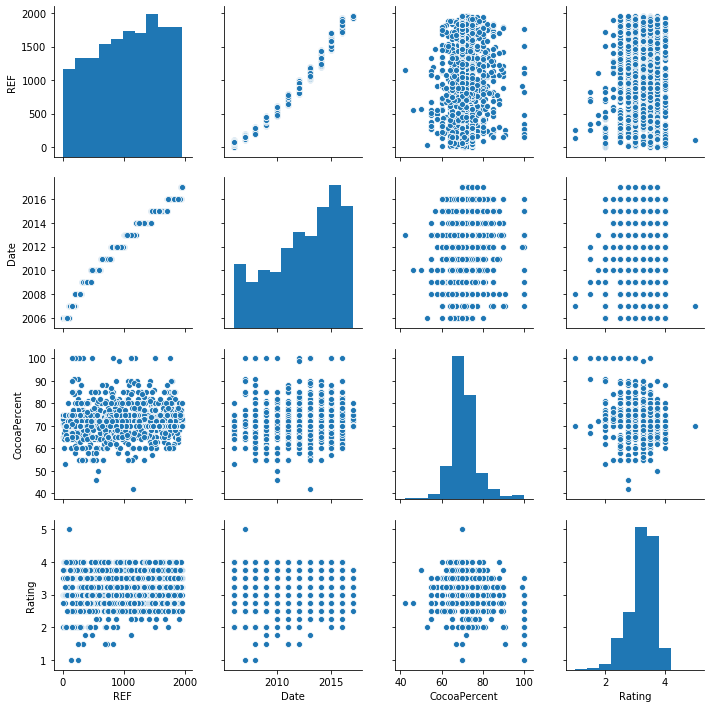

In [44]:
#Looking at correlation between continuous features
import seaborn as sns
sns.pairplot(Chocolate_cleaned);

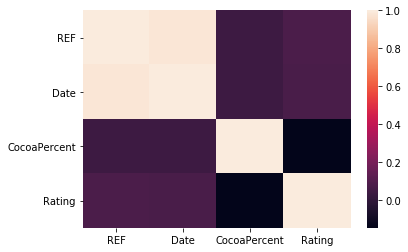

In [43]:
#Heat map to show correlation between continuous features
sns.heatmap(Chocolate_cleaned.corr())

In [45]:
#Removed Date because it is directly correlated with REF number
UpdatedChocolate=Chocolate_cleaned.drop(columns=['Date'])

In [46]:
UpdatedChocolate.head()

,Company,REF,CocoaPercent,Location,Rating,BroadOrigin
0,A. Morin,1876,63.0,France,3.75,Sao Tome
1,A. Morin,1676,70.0,France,2.75,Togo
2,A. Morin,1676,70.0,France,3.00,Togo
3,A. Morin,1680,70.0,France,3.50,Togo
4,A. Morin,1704,70.0,France,3.50,Peru


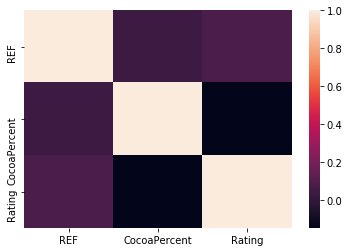

In [46]:
#Heatmap showing correlations of remaining continuous variables
sns.heatmap(UpdatedChocolate.corr())

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [48]:
#Encode categorical features into ordinal with dummy varriables 
EncodedChocolate=pd.get_dummies(UpdatedChocolate[['Company', 'Location', 'BroadOrigin']])

In [49]:
EncodedChocolate.head()

,Company_A. Morin,Company_AMMA,Company_Acalli,Company_Adi,Company_Aequare (Gianduja),Company_Ah Cacao,Company_Akesson's (Pralus),Company_Alain Ducasse,Company_Alexandre,Company_Altus aka Cao Artisan,...,"BroadOrigin_Venez,Africa,Brasil,Peru,Mex",BroadOrigin_Venezuela,"BroadOrigin_Venezuela, Carribean","BroadOrigin_Venezuela, Dom. Rep.","BroadOrigin_Venezuela, Ghana","BroadOrigin_Venezuela, Java","BroadOrigin_Venezuela, Trinidad",BroadOrigin_Venezuela/ Ghana,BroadOrigin_Vietnam,BroadOrigin_West Africa
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#Join dummy variable dataframe to cleaned dataframe
ChocolateTotal=UpdatedChocolate.join(EncodedChocolate) 

In [51]:
ChocolateTotal.head()

,Company,REF,CocoaPercent,Location,Rating,BroadOrigin,Company_A. Morin,Company_AMMA,Company_Acalli,Company_Adi,...,"BroadOrigin_Venez,Africa,Brasil,Peru,Mex",BroadOrigin_Venezuela,"BroadOrigin_Venezuela, Carribean","BroadOrigin_Venezuela, Dom. Rep.","BroadOrigin_Venezuela, Ghana","BroadOrigin_Venezuela, Java","BroadOrigin_Venezuela, Trinidad",BroadOrigin_Venezuela/ Ghana,BroadOrigin_Vietnam,BroadOrigin_West Africa
0,A. Morin,1876,63.0,France,3.75,Sao Tome,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A. Morin,1676,70.0,France,2.75,Togo,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A. Morin,1676,70.0,France,3.00,Togo,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A. Morin,1680,70.0,France,3.50,Togo,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A. Morin,1704,70.0,France,3.50,Peru,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#Drop variable columns that were made into dummy varriables
ChocolateReady=ChocolateTotal.drop(['Company', 'Location', 'BroadOrigin'], axis=1)

In [53]:
ChocolateReady.head()

,REF,CocoaPercent,Rating,Company_A. Morin,Company_AMMA,Company_Acalli,Company_Adi,Company_Aequare (Gianduja),Company_Ah Cacao,Company_Akesson's (Pralus),...,"BroadOrigin_Venez,Africa,Brasil,Peru,Mex",BroadOrigin_Venezuela,"BroadOrigin_Venezuela, Carribean","BroadOrigin_Venezuela, Dom. Rep.","BroadOrigin_Venezuela, Ghana","BroadOrigin_Venezuela, Java","BroadOrigin_Venezuela, Trinidad",BroadOrigin_Venezuela/ Ghana,BroadOrigin_Vietnam,BroadOrigin_West Africa
0,1876,63.0,3.75,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1676,70.0,2.75,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1676,70.0,3.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1680,70.0,3.50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1704,70.0,3.50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
ChocolateReady.dtypes

REF                                           int64
CocoaPercent                                float64
Rating                                      float64
Company_A. Morin                              uint8
Company_AMMA                                  uint8
Company_Acalli                                uint8
Company_Adi                                   uint8
Company_Aequare (Gianduja)                    uint8
Company_Ah Cacao                              uint8
Company_Akesson's (Pralus)                    uint8
Company_Alain Ducasse                         uint8
Company_Alexandre                             uint8
Company_Altus aka Cao Artisan                 uint8
Company_Amano                                 uint8
Company_Amatller (Simon Coll)                 uint8
Company_Amazona                               uint8
Company_Ambrosia                              uint8
Company_Amedei                                uint8
Company_Anahata                               uint8
Company_Anim

In [55]:
#Predicting rating; set Rating values to target
target= ChocolateReady.Rating
target.shape

(1721,)

In [56]:
# All other features are the predictors
Chocolate_predictors= ChocolateReady.drop(["Rating"], axis=1)
Chocolate_predictors.shape

(1721, 570)

In [57]:
#Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(Chocolate_predictors, target, test_size=0.33)

In [58]:
#Make random forest regressor model. 
rf = RandomForestRegressor()

# Fit 
rf.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [59]:
# Predict
y_predicted = rf.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted)

0.18709154138274867

In [60]:
# Calculate mean absolute percentage error (MAPE)
errors = abs(y_predicted - y_test)

mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.59 %.


In [61]:
#Can we improve the model using Grid Search?
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Create  
rf = RandomForestRegressor()
# Create grid search instance 
gscv = GridSearchCV(rf, 
                    {"max_depth": range(1, 20),"n_estimators": range(1, 20)}, 
                    cv=kf, n_jobs=-1)

gscv.fit(X_train, y_train)


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1

In [62]:
gscv.best_params_

{'max_depth': 19, 'n_estimators': 15}

In [63]:
rf = RandomForestRegressor(max_depth=19,n_estimators= 15 )
rf.fit(X_train, y_train)

# Predict
y_predicted2 = rf.predict(X_test)

# Test
mean_squared_error(y_test, y_predicted2)

0.1796127027317282

In [64]:
# Calculate mean absolute percentage error (MAPE)
errors2 = abs(y_predicted2 - y_test)

mape = 100 * (errors2 / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.64 %.


In [65]:
# Get numerical feature importances
importances = rf.feature_importances_

feature_importance= pd.DataFrame(importances, index= X_train.columns)

In [66]:
feature_importance.head(20)

,0
REF,0.173346
CocoaPercent,0.141078
Company_A. Morin,0.001846
Company_AMMA,0.006851
Company_Acalli,0.000353
Company_Adi,0.000231
Company_Aequare (Gianduja),0.000060
Company_Ah Cacao,0.000000
Company_Akesson's (Pralus),0.000071
Company_Alain Ducasse,0.000083


In [67]:
import matplotlib.pyplot as plt

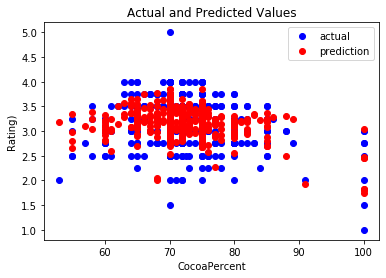

In [68]:
#Visualize the actual and predicted values in relation to Cocoa percent
true_data = pd.DataFrame(data = {'CocoaPercent':X_test['CocoaPercent'] , 'actual': y_test})
predictions_data= pd.DataFrame(data={'CocoaPercent':X_test['CocoaPercent'], 'predicted':y_predicted})
plt.plot(true_data['CocoaPercent'], true_data['actual'], 'bo', label = 'actual')
plt.plot(predictions_data['CocoaPercent'], predictions_data['predicted'], 'ro', label='prediction')
plt.legend()
# Graph labels
plt.xlabel('CocoaPercent'); 
plt.ylabel('Rating)'); 
plt.title('Actual and Predicted Values');

In [80]:
np.unique(y_test)

array([1.  , 1.5 , 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  ,
       5.  ])

In [69]:
#Look at predicted values
np.unique(y_predicted)

array([1.75      , 1.8       , 1.825     , 1.925     , 2.        ,
       2.05      , 2.275     , 2.45      , 2.475     , 2.4875    ,
       2.53958333, 2.55      , 2.575     , 2.6       , 2.65      ,
       2.675     , 2.7       , 2.70208333, 2.725     , 2.75      ,
       2.775     , 2.78333333, 2.8       , 2.80625   , 2.825     ,
       2.84375   , 2.85      , 2.875     , 2.9       , 2.91388889,
       2.925     , 2.95      , 2.9625    , 2.96875   , 2.975     ,
       3.        , 3.025     , 3.05      , 3.06875   , 3.075     ,
       3.08333333, 3.09375   , 3.1       , 3.12375   , 3.125     ,
       3.1375    , 3.14166667, 3.15      , 3.1625    , 3.16875   ,
       3.175     , 3.18333333, 3.2       , 3.205     , 3.225     ,
       3.23333333, 3.25      , 3.25416667, 3.26875   , 3.275     ,
       3.3       , 3.31875   , 3.325     , 3.33      , 3.33625   ,
       3.34375   , 3.35      , 3.3625    , 3.375     , 3.38      ,
       3.38125   , 3.3875    , 3.39375   , 3.4       , 3.425  

The above models are treating the rating value as a float when in reality, the rating has discrete options and is not a continous value. 
Instead use a classifier and change the ratings to non continuous data.

In [70]:
#Use label encoder to change the chocolate ratings (target) into 
#categorical features
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(target)
label_encoded_y = label_encoder.transform(target)

In [71]:
np.unique(label_encoded_y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [72]:
#Target y values are no longer continuous
label_encoded_y.dtype

dtype('int64')

In [73]:
Xclass_train, Xclass_test, yclass_train, yclass_test = train_test_split(Chocolate_predictors, label_encoded_y, test_size=0.33)

In [74]:
#Instantiate the random forest classifier model
rfc = RandomForestClassifier()

# Fit 
rfc.fit(Xclass_train, yclass_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
yclass_predicted = rfc.predict(Xclass_test)

mean_squared_error(yclass_test, yclass_predicted)

5.389084507042254

In [76]:
print(rfc.score(Xclass_train, yclass_train))
print(rfc.score(Xclass_test, yclass_test))

0.9531656548135299
0.20774647887323944


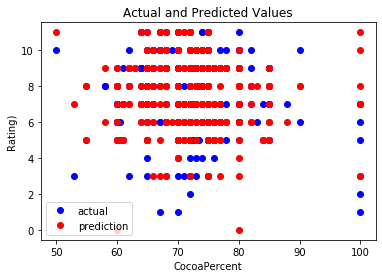

In [77]:
true_data = pd.DataFrame(data = {'CocoaPercent':Xclass_test['CocoaPercent'] , 'actual': yclass_test})
predictions_data= pd.DataFrame(data={'CocoaPercent':Xclass_test['CocoaPercent'], 'predicted':yclass_predicted})
plt.plot(true_data['CocoaPercent'], true_data['actual'], 'bo', label = 'actual')
plt.plot(predictions_data['CocoaPercent'], predictions_data['predicted'], 'ro', label='prediction')
plt.legend()
# Graph labels
plt.xlabel('CocoaPercent'); 
plt.ylabel('Rating)'); 
plt.title('Actual and Predicted Values');

This classifier does not accurately predict the chocolate rating well. I have tried to motify it a bit but I cannot create a classifier with a higher accuracy. The Random forrest regressor is relatively good at getting close to the rating. One model that I think could be good would take the Random Forrest Regressor prediction and then round that value to the nearest possible score (i.e the regressor output value of 3.43 turns into 3.5, 3.575 turns into 3.5